# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Might need to install citipy... if so: pip install citipy

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [3]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 591


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        res = requests.get(city_url)
        city_weather = res.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | uturoa
Processing Record 3 of Set 1 | crane
Processing Record 4 of Set 1 | adamstown
Processing Record 5 of Set 1 | isafjordur
Processing Record 6 of Set 1 | hamilton
Processing Record 7 of Set 1 | lionel town
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | enewetak
Processing Record 10 of Set 1 | nizhnevartovsk
Processing Record 11 of Set 1 | olonkinbyen
Processing Record 12 of Set 1 | atafu village
Processing Record 13 of Set 1 | izazi
Processing Record 14 of Set 1 | lospalos
Processing Record 15 of Set 1 | dudinka
Processing Record 16 of Set 1 | san antonio de pale
Processing Record 17 of Set 1 | port-aux-francais
Processing Record 18 of Set 1 | point pedro
Processing Record 19 of Set 1 | vigan
Processing Record 20 of Set 1 | iqaluit
Processing Record 21 of Set 1 | puerto baquerizo moreno
Processing Record 22 of Set 1 | 'i

Processing Record 36 of Set 4 | revda
Processing Record 37 of Set 4 | utrik
Processing Record 38 of Set 4 | twin falls
Processing Record 39 of Set 4 | san julian
Processing Record 40 of Set 4 | cooma
Processing Record 41 of Set 4 | rio grande
Processing Record 42 of Set 4 | paramonga
Processing Record 43 of Set 4 | buka
Processing Record 44 of Set 4 | lompoc
Processing Record 45 of Set 4 | keflavik
Processing Record 46 of Set 4 | chernyshevskiy
Processing Record 47 of Set 4 | sonsorol village
City not found. Skipping...
Processing Record 48 of Set 4 | boca do acre
Processing Record 49 of Set 4 | devinuwara
City not found. Skipping...
Processing Record 0 of Set 5 | pisco
Processing Record 1 of Set 5 | ta`u
Processing Record 2 of Set 5 | espargos
City not found. Skipping...
Processing Record 3 of Set 5 | thompson
Processing Record 4 of Set 5 | kodiak
Processing Record 5 of Set 5 | pangkalpinang
Processing Record 6 of Set 5 | madalena
Processing Record 7 of Set 5 | queenstown
Processing R

Processing Record 26 of Set 8 | kataragama
City not found. Skipping...
Processing Record 27 of Set 8 | peace river
Processing Record 28 of Set 8 | turbat
Processing Record 29 of Set 8 | palmer
Processing Record 30 of Set 8 | baardheere
Processing Record 31 of Set 8 | yangor
City not found. Skipping...
Processing Record 32 of Set 8 | runnemede
Processing Record 33 of Set 8 | balaipungut
Processing Record 34 of Set 8 | la passe
Processing Record 35 of Set 8 | sao jose do egito
Processing Record 36 of Set 8 | tukrah
Processing Record 37 of Set 8 | vostochnyy
Processing Record 38 of Set 8 | danielskuil
Processing Record 39 of Set 8 | inarajan village
Processing Record 40 of Set 8 | alexandroupoli
Processing Record 41 of Set 8 | saipan
Processing Record 42 of Set 8 | axim
Processing Record 43 of Set 8 | severomorsk
Processing Record 44 of Set 8 | sidi bennour
Processing Record 45 of Set 8 | colonia
Processing Record 46 of Set 8 | saldanha
Processing Record 47 of Set 8 | boqueirao
Processing

Processing Record 17 of Set 12 | araripina
Processing Record 18 of Set 12 | ibiza
Processing Record 19 of Set 12 | nagqu
Processing Record 20 of Set 12 | eureka
Processing Record 21 of Set 12 | preobrazheniye
Processing Record 22 of Set 12 | mar del plata
Processing Record 23 of Set 12 | sidhi
Processing Record 24 of Set 12 | adrar
Processing Record 25 of Set 12 | esil
Processing Record 26 of Set 12 | coronel suarez
Processing Record 27 of Set 12 | kogon shahri
City not found. Skipping...
Processing Record 28 of Set 12 | karratha
Processing Record 29 of Set 12 | al jawf
Processing Record 30 of Set 12 | nantucket
Processing Record 31 of Set 12 | toga village
City not found. Skipping...
Processing Record 32 of Set 12 | bell ville
Processing Record 33 of Set 12 | san marcos
Processing Record 34 of Set 12 | vincennes
Processing Record 35 of Set 12 | agbor
Processing Record 36 of Set 12 | hayma'
City not found. Skipping...
Processing Record 37 of Set 12 | mil'kovo
Processing Record 38 of Se

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          559
Lat           559
Lng           559
Max Temp      559
Humidity      559
Cloudiness    559
Wind Speed    559
Country       559
Date          559
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port elizabeth,-33.9180,25.5701,294.99,42,0,1.34,ZA,1716259721
1,uturoa,-16.7333,-151.4333,299.84,72,26,8.55,PF,1716259721
2,crane,31.3974,-102.3501,304.70,27,91,7.99,US,1716259722
3,adamstown,-25.0660,-130.1015,293.39,54,98,5.50,PN,1716259722
4,isafjordur,66.0755,-23.1240,274.13,99,100,1.06,IS,1716259722


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,294.99,42,0,1.34,ZA,1716259721
1,uturoa,-16.7333,-151.4333,299.84,72,26,8.55,PF,1716259721
2,crane,31.3974,-102.3501,304.70,27,91,7.99,US,1716259722
3,adamstown,-25.0660,-130.1015,293.39,54,98,5.50,PN,1716259722
4,isafjordur,66.0755,-23.1240,274.13,99,100,1.06,IS,1716259722


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

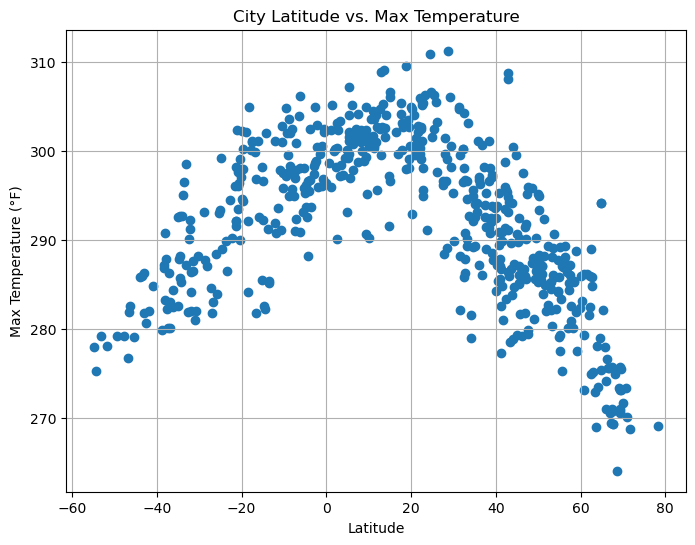

In [9]:
# Build scatter plot for latitude vs. temperature
latitudes = [city['Lat'] for city in city_data]
max_temperatures = [city['Max Temp'] for city in city_data]
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, max_temperatures, marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Max Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (°F)')
plt.grid(True)

# Save the figure
plt.savefig("Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

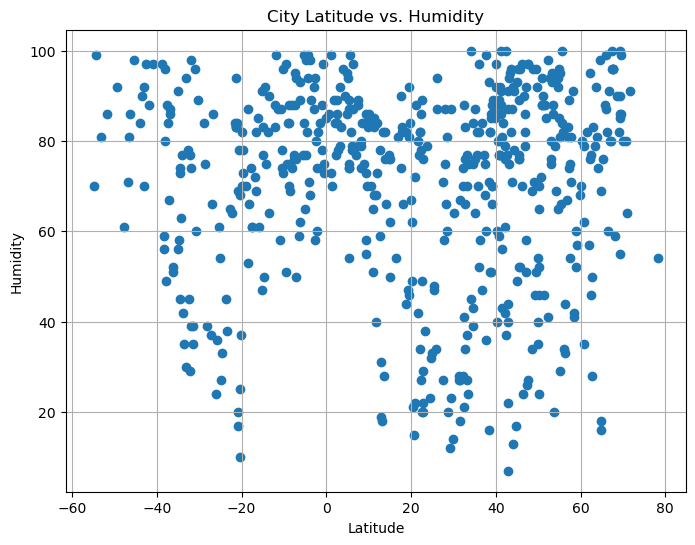

In [10]:
# Build the scatter plots for latitude vs. humidity
humidity = [city['Humidity'] for city in city_data]
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, humidity, marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.grid(True)

# Save the figure
plt.savefig("Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

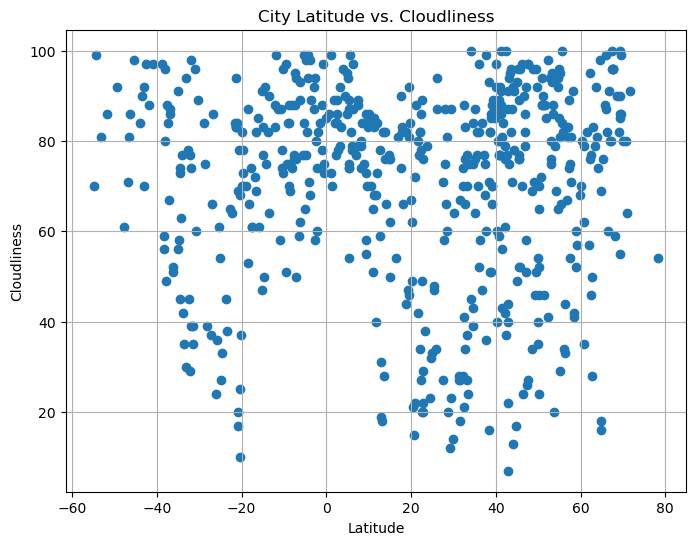

In [11]:
# Build the scatter plots for latitude vs. cloudiness
cloudliness = [city['Cloudiness'] for city in city_data]
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, humidity, marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudliness')
plt.xlabel('Latitude')
plt.ylabel('Cloudliness')
plt.grid(True)

# Save the figure
plt.savefig("Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

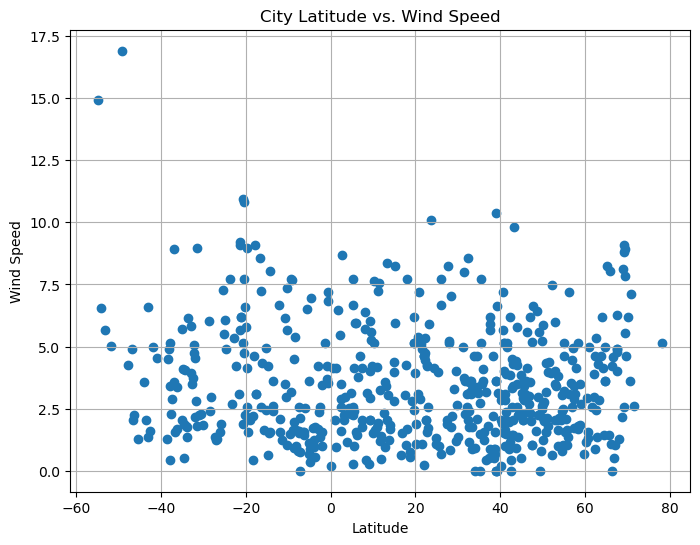

In [12]:
# Build the scatter plots for latitude vs. wind speed
wind_speed = [city['Wind Speed'] for city in city_data]
plt.figure(figsize=(8, 6))
plt.scatter(latitudes, wind_speed, marker='o')

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(True)

# Save the figure
plt.savefig("Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [13]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x, y, xlabel, ylabel, title):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    regress_values = slope * x + intercept
    plt.scatter(x, y, marker='o')
    plt.plot(x, regress_values, 'r-', label='Linear Regression')
    line = f'y = {slope:.2f}x + {intercept:.2f}'
    plt.annotate(line, (np.mean(x), np.mean(y)), fontsize=12, color='red')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    print(f"The r-value is: {r_value}")

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,crane,31.3974,-102.3501,304.70,27,91,7.99,US,1716259722
4,isafjordur,66.0755,-23.1240,274.13,99,100,1.06,IS,1716259722
5,hamilton,39.1834,-84.5333,297.02,70,0,0.00,US,1716259722
6,lionel town,17.8101,-77.2406,303.09,83,96,4.24,JM,1716259722
7,yellowknife,62.4560,-114.3525,288.94,46,20,4.63,CA,1716259593


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,port elizabeth,-33.9180,25.5701,294.99,42,0,1.34,ZA,1716259721
1,uturoa,-16.7333,-151.4333,299.84,72,26,8.55,PF,1716259721
3,adamstown,-25.0660,-130.1015,293.39,54,98,5.50,PN,1716259722
11,atafu village,-8.5421,-172.5159,301.95,75,100,4.50,TK,1716259723
12,izazi,-7.2000,35.7333,292.37,76,100,0.75,TZ,1716259724


###  Temperature vs. Latitude Linear Regression Plot

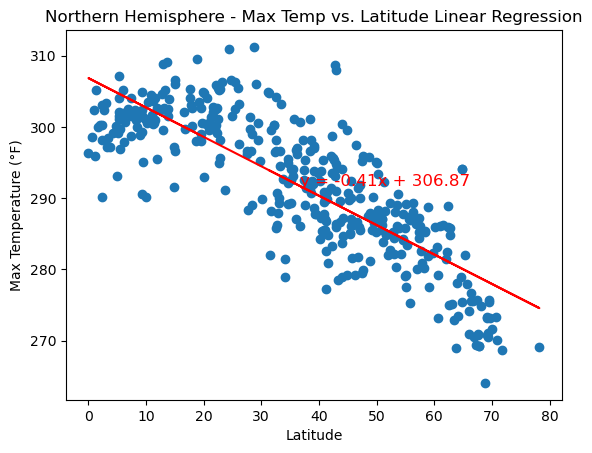

The r-value is: -0.8165236395619511


In [16]:
# Linear regression on Northern Hemisphere
northern_latitudes = northern_hemi_df['Lat']
northern_max_temperatures = northern_hemi_df['Max Temp']

plot_linear_regression(northern_latitudes, northern_max_temperatures, 'Latitude', 'Max Temperature (°F)', 'Northern Hemisphere - Max Temp vs. Latitude Linear Regression')

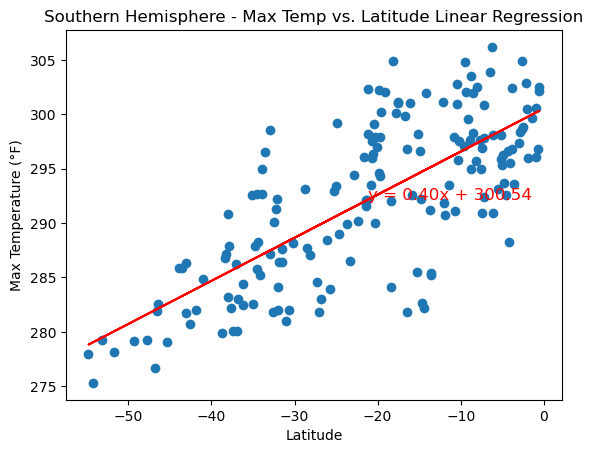

The r-value is: 0.7485574102721628


In [17]:
# Linear regression on Southern Hemisphere
southern_latitudes = southern_hemi_df['Lat']
southern_max_temperatures = southern_hemi_df['Max Temp']

plot_linear_regression(southern_latitudes, southern_max_temperatures, 'Latitude', 'Max Temperature (°F)', 'Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The Temperature increases as the Latitude increases

### Humidity vs. Latitude Linear Regression Plot

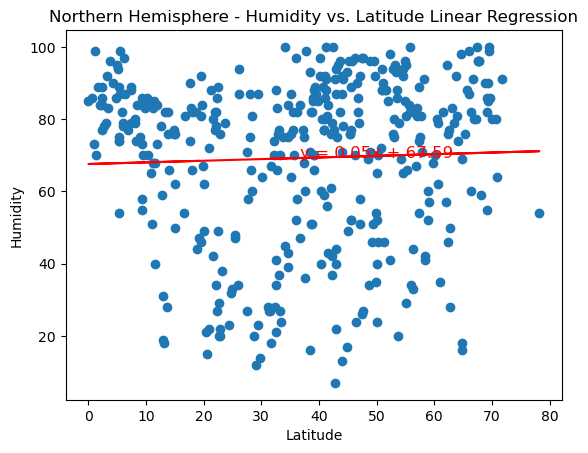

The r-value is: 0.03829408076332342


In [18]:
# Northern Hemisphere
northern_latitudes = northern_hemi_df['Lat']
northern_humidity = northern_hemi_df['Humidity']

plot_linear_regression(northern_latitudes, northern_humidity, 'Latitude', 'Humidity', 'Northern Hemisphere - Humidity vs. Latitude Linear Regression')

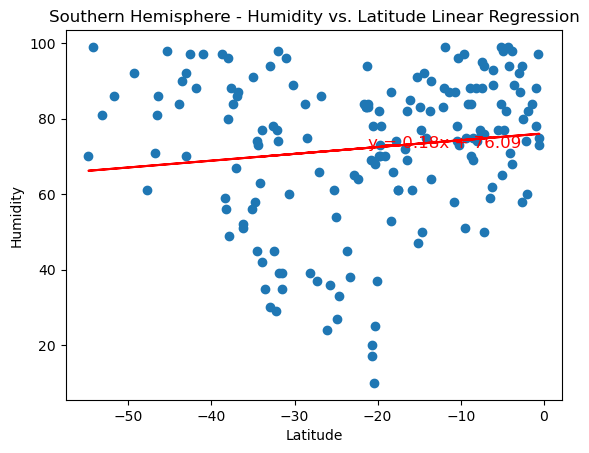

The r-value is: 0.1268948748839991


In [19]:
# Southern Hemisphere
southern_latitudes = southern_hemi_df['Lat']
southern_humidity = southern_hemi_df['Humidity']

plot_linear_regression(southern_latitudes, southern_humidity, 'Latitude', 'Humidity', 'Southern Hemisphere - Humidity vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The humidity increases as the Latitude increases

### Cloudiness vs. Latitude Linear Regression Plot

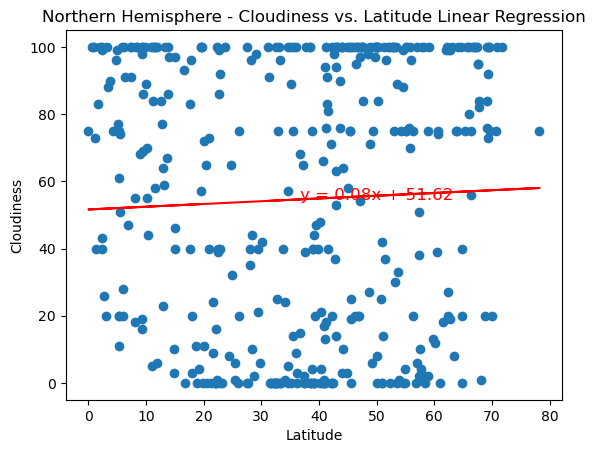

The r-value is: 0.039767586815070664


In [20]:
# Northern Hemisphere
northern_latitudes = northern_hemi_df['Lat']
northern_cloudiness = northern_hemi_df['Cloudiness']

plot_linear_regression(northern_latitudes, northern_cloudiness, 'Latitude', 'Cloudiness', 'Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')

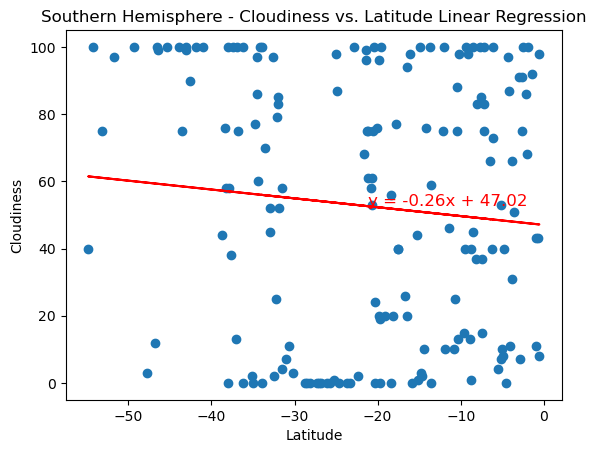

The r-value is: -0.09604668524228649


In [21]:
# Southern Hemisphere
southern_latitudes = southern_hemi_df['Lat']
southern_cloudiness = southern_hemi_df['Cloudiness']

plot_linear_regression(southern_latitudes, southern_cloudiness, 'Latitude', 'Cloudiness', 'Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The cloudiness increases as the latitude increases.

### Wind Speed vs. Latitude Linear Regression Plot

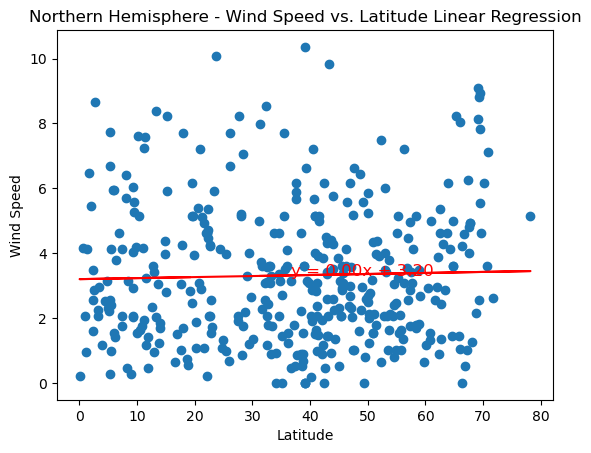

The r-value is: 0.029183036834627536


In [22]:
# Northern Hemisphere
northern_latitudes = northern_hemi_df['Lat']
northern_wind_speed = northern_hemi_df['Wind Speed']

plot_linear_regression(northern_latitudes, northern_wind_speed, 'Latitude', 'Wind Speed', 'Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')

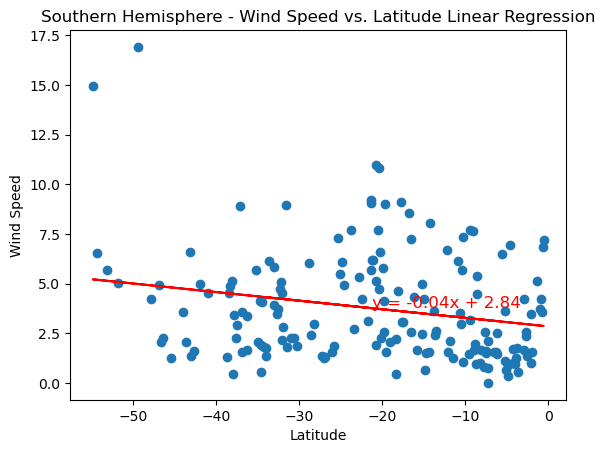

The r-value is: -0.22029776538206117


In [23]:
# Southern Hemisphere
southern_latitudes = southern_hemi_df['Lat']
southern_wind_speed = southern_hemi_df['Wind Speed']

plot_linear_regression(southern_latitudes, southern_wind_speed, 'Latitude', 'Wind Speed', 'Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')

**Discussion about the linear relationship:** The wind speed decreases as the latitude increases.